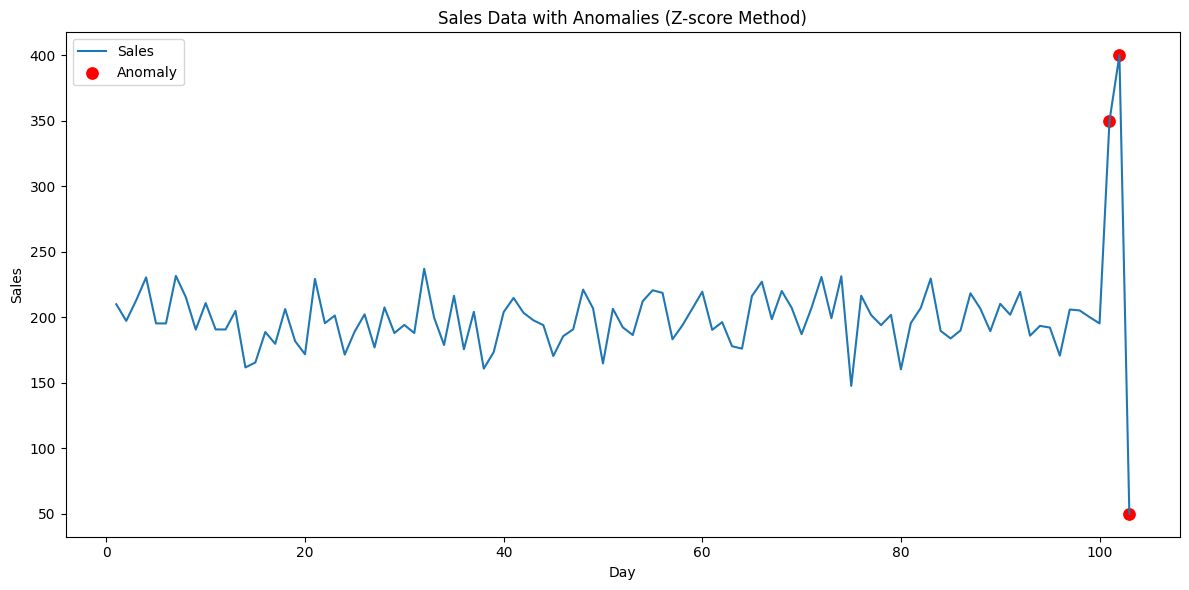

...
----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


Anomaly count: 3


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import unittest

# Step 1: Simulate daily sales data for 100 days
def generate_sales_data(seed=42, size=100):
    np.random.seed(seed)
    # Generate mostly normal data with a few outliers
    sales = np.random.normal(loc=200, scale=20, size=size).tolist()
    sales.extend([350, 400, 50])  # Add outliers
    return pd.DataFrame({'Day': range(1, len(sales)+1), 'Sales': sales})

# Step 2 & 3: Compute Z-scores and detect anomalies
def detect_anomalies_zscore(df, threshold=3):
    try:
        df['Z_score'] = zscore(df['Sales'])
        df['Anomaly'] = df['Z_score'].apply(lambda x: 1 if abs(x) > threshold else 0)
        return df
    except Exception as e:
        print("Error computing Z-scores:", e)
        return df

# Step 4: Plot anomalies
def plot_anomalies(df):
    try:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x='Day', y='Sales', data=df, label='Sales')
        sns.scatterplot(x='Day', y='Sales', data=df[df['Anomaly'] == 1], color='red', label='Anomaly', s=100)
        plt.title("Sales Data with Anomalies (Z-score Method)")
        plt.xlabel("Day")
        plt.ylabel("Sales")
        plt.legend()
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("Error during plotting:", e)

# Unit Test Class
class TestZScoreAnomalyDetection(unittest.TestCase):
    def test_anomaly_column_exists(self):
        self.assertIn('Anomaly', sales_df.columns)
    def test_zscore_column_exists(self):
        self.assertIn('Z_score', sales_df.columns)
    def test_detected_outliers(self):
        self.assertGreater(sales_df['Anomaly'].sum(), 0)

# Main execution
sales_df = generate_sales_data()
sales_df = detect_anomalies_zscore(sales_df)
plot_anomalies(sales_df)

print("Anomaly count:", sales_df['Anomaly'].sum())

# Run tests
if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)
